In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, SelectKBest, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

sns.set()
pd.set_option('display.max_columns', None)

### Data path variables

In [111]:
STATE = 0
DATA_PATH = 'data/internship_train.csv'
HIDDEN_DATA_TEST = 'data/internship_hidden_test.csv'

### Read & explore data

In [103]:
raw_data = pd.read_csv(DATA_PATH)
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [54]:
raw_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,249.818967,249.346778,249.899900,7.483940,7.498037,7.496259,7.501635,7.486463,7.523043,7.475585,7.494835,7.503939,7.507724,7.508681,7.472421,7.519205,7.515753,7.509402,7.496781,7.504014,7.494212,7.490808,7.486936,7.514508,7.491614,7.520193,7.507801,7.493713,7.513840,7.507033,7.479579,7.519826,7.502483,7.512965,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,144.363827,144.476128,144.310495,4.330908,4.318388,4.338732,4.345618,4.318031,4.323500,4.327327,4.325447,4.330159,4.332599,4.328966,4.345228,4.339104,4.333907,4.331007,4.334982,4.318553,4.327286,4.322672,4.329524,4.329973,4.333144,4.335244,4.329515,4.327480,4.333543,4.327670,4.326175,4.315565,4.333881,4.329929,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000252,0.000190,0.000192,0.000067,0.000229,0.000125,0.000382,0.000398,0.000140,0.000382,0.000129,0.000192,0.000017,0.000080,0.000161,0.000437,0.000041,0.000070,0.000074,0.000111,0.000067,0.000078,0.000018,0.000094,0.000020,0.000106,0.000105,0.000273,0.000315,0.000060,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,126.000000,124.000000,125.000000,3.723392,3.763626,3.718755,3.719537,3.758746,3.778857,3.733780,3.748951,3.760261,3.742810,3.768145,3.685140,3.760790,3.746467,3.772795,3.741697,3.774239,3.743116,3.763061,3.750034,3.778028,3.743842,3.752848,3.776405,3.755325,3.754465,3.771945,3.731527,3.784809,3.763004,3.768044,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,250.000000,249.000000,251.000000,7.483265,7.505267,7.502682,7.515240,7.467721,7.539462,7.460267,7.481500,7.521563,7.520793,7.520739,7.484349,7.526894,7.528984,7.494876,7.491009,7.500083,7.514475,7.483334,7.458614,7.513794,7.475324,7.550623,7.484699,7.472789,7.518614,7.504101,7.452493,7.532363,7.511806,7.507058,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,375.000000,375.000000,375.000000,11.242883,11.228331,11.258049,11.284618,11.238904,11.254751,11.211187,11.238128,11.248749,11.244657,11.240915,11.239795,11.276738,11.272683,11.271486,11.257988,11.233189,11.223296,11.229486,11.245719,11.272623,11.241922,11.261178,11.255442,11.251097,11.270277,11.241504,11.222543,11.241135,11.255483,11.272459,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.00000

In [110]:
unique_stat = raw_data.nunique()
pd.DataFrame(data=unique_stat, columns=['unique_values_count'])

,unique_values_count
0,500
1,500
2,500
3,500
4,500
5,500
6,199
7,90000
8,2
9,500


In [121]:
null_stats = raw_data.isnull().sum()
pd.DataFrame(data=null_stats, columns=['null_values_count'])

,null_values_count
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Data seems clean (no missing values), so we can continue with feature selection

### Feature selection

In [65]:
y = raw_data['target']
x = raw_data.drop('target', axis=1)

In [138]:
def sample_pairplot(x, y, sample_size=1000) -> None:
    data = x.copy()
    data['target'] = y
    data = data.sample(n=sample_size, random_state=STATE)
    sns.pairplot(data)
    plt.show()

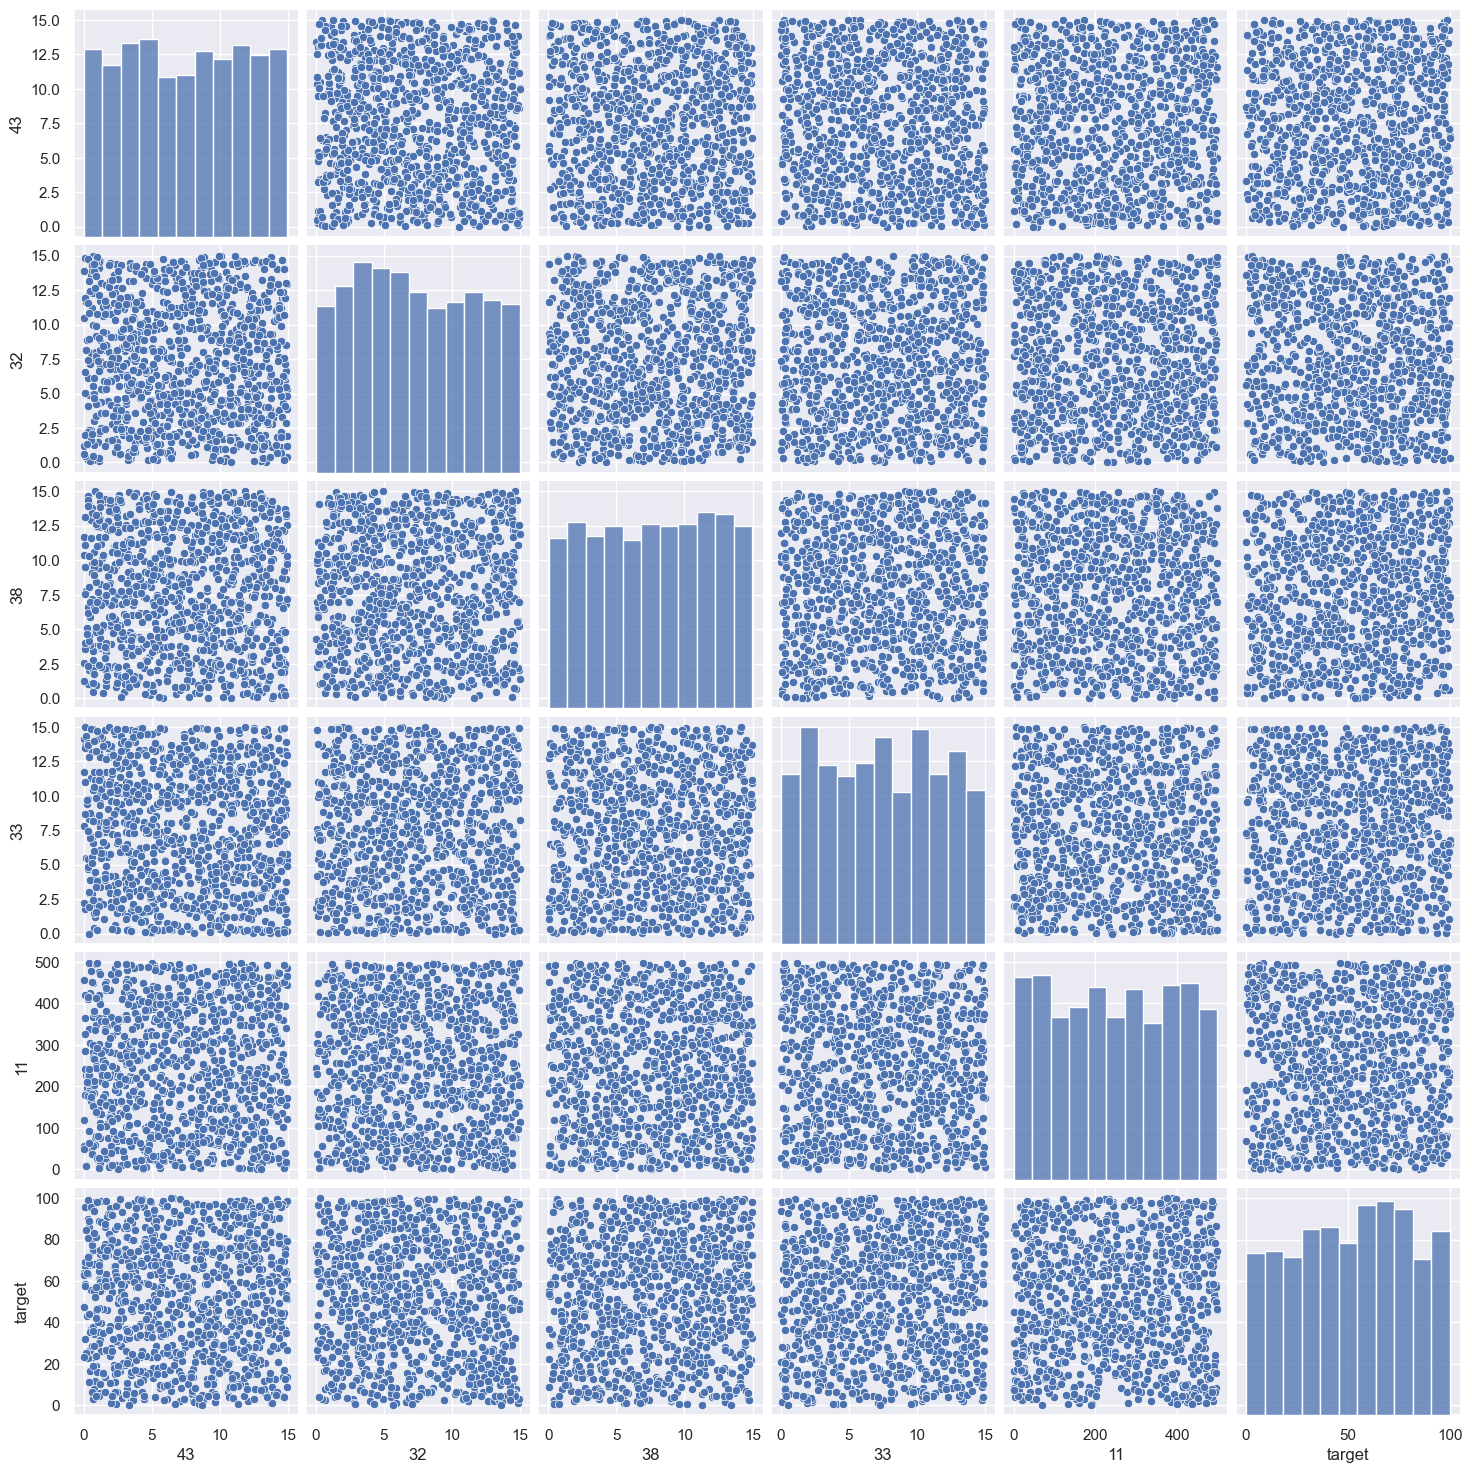

In [139]:
test = x.sample(n=5, axis='columns', random_state=STATE)
sample_pairplot(test, y)

In [127]:
selector_freg = SelectKBest(score_func=f_regression, k='all')
selector_freg.fit(x, y)

pd.DataFrame(data=selector_freg.scores_, columns=['freg_score'])

,freg_score
0,0.530317
1,2.767230
2,0.090561
3,0.709088
4,0.152153
5,0.406353
6,0.039942
7,13.185012
8,0.010812
9,0.203697


We can see, that f_regression returns values even out of range [-1, 1]. That can be because non-linear dependency between features and target. Let's check it

In [149]:
# use one more score function for feature selection, which can capture any kind of dependency 
selector_mutinfo = SelectKBest(score_func=mutual_info_regression, k='all')
selector_mutinfo.fit(x, y)

stats = pd.DataFrame(data=selector_mutinfo.scores_, columns=['mutual_info_score'])
stats = stats.sort_values('mutual_info_score', ascending=False)
stats

,mutual_info_score
6,4.602137
7,1.274221
12,0.007872
29,0.005362
22,0.004537
23,0.004287
28,0.003347
33,0.003322
2,0.003113
47,0.001964


Now we see that feature 6 and partially feature 7 have the most influence on the target. Let's visualize it

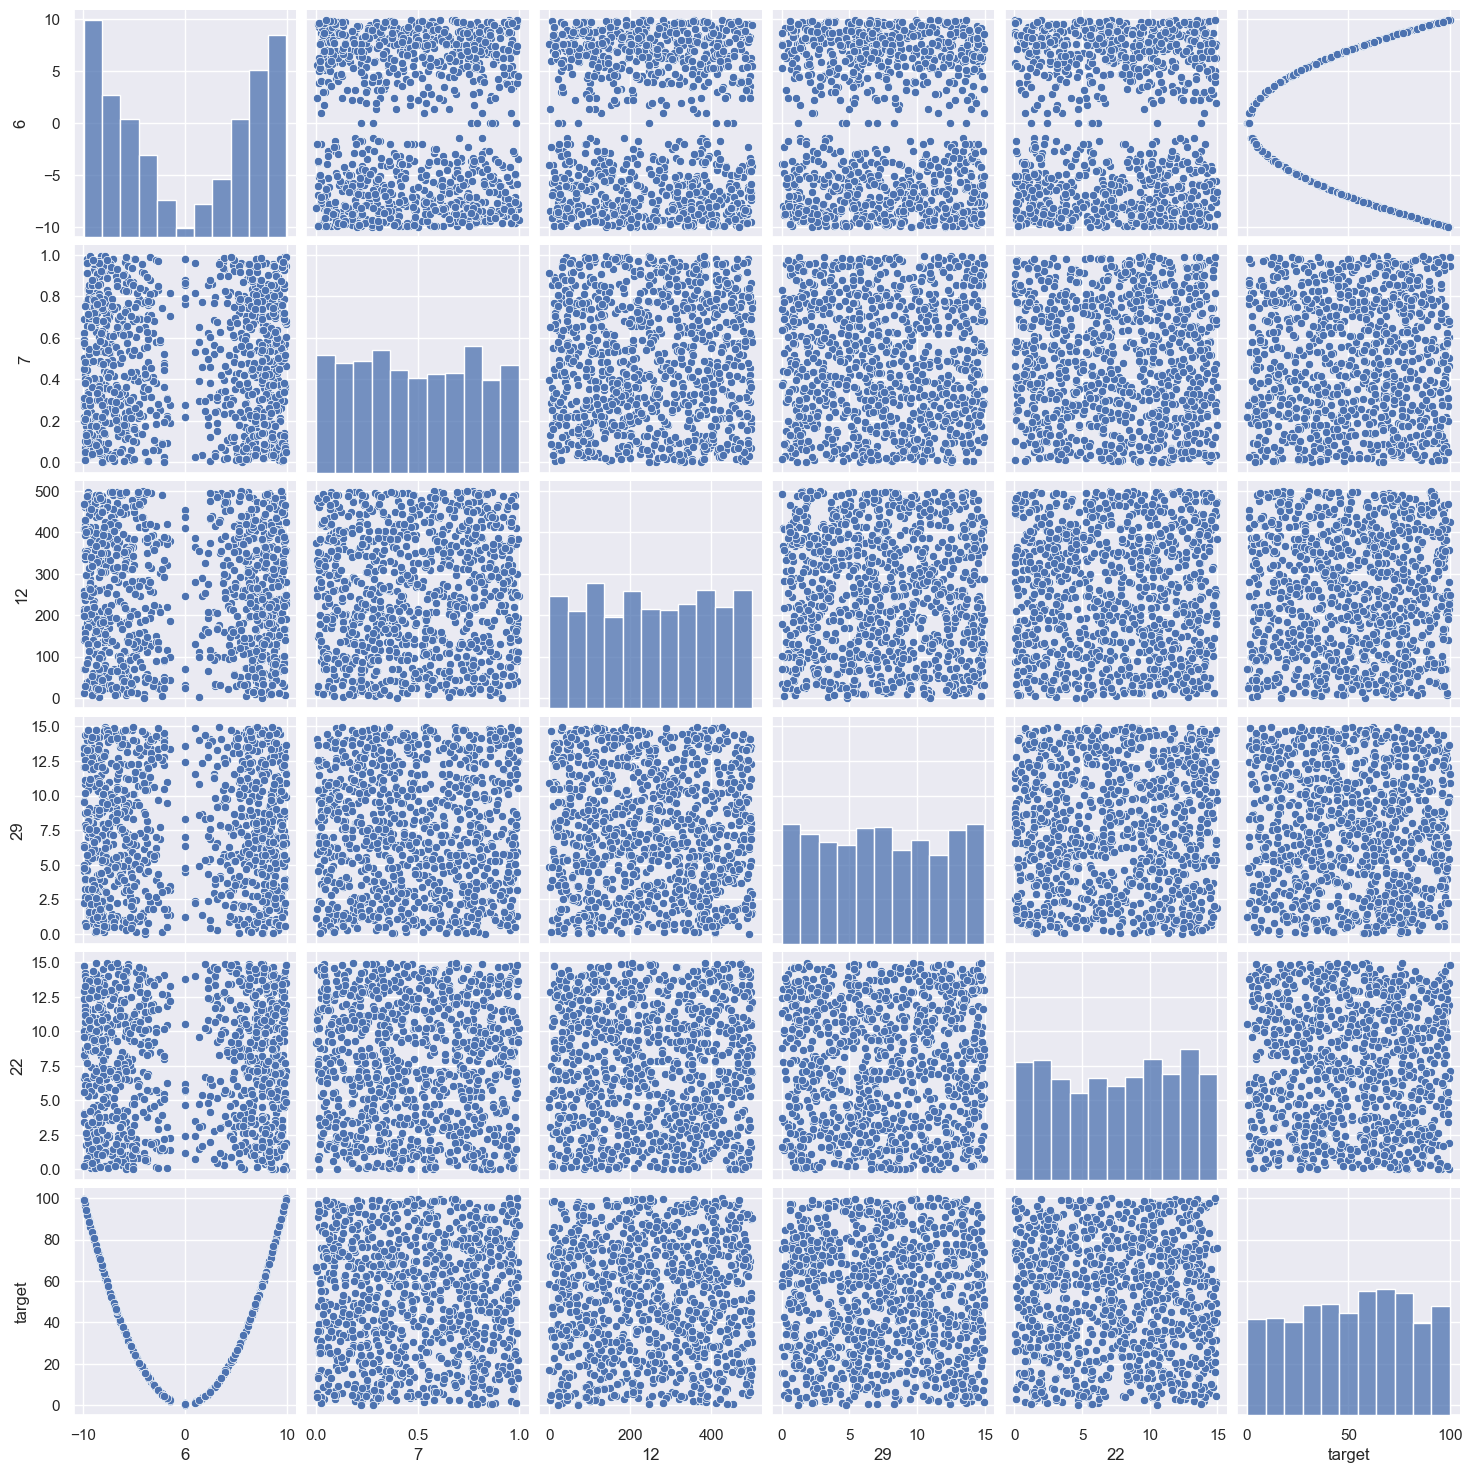

In [167]:
criteria = [str(i) for i in stats.head(5).index]
sample_pairplot(x[criteria], y)

#### Feature 6 has strong influence on target and dependency is parabaloic

### Build a model

### !! Do not forget scaler

In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=STATE)

In [174]:
regressor = DecisionTreeRegressor(random_state=STATE, criterion='squared_error')
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [98]:
feature_importances = pd.DataFrame(regressor.feature_importances_, columns=['importance'])
feature_importances.sort_values('importance', ascending=False)

,importance
6,9.999005e-01
7,9.945944e-05
52,8.514665e-10
22,8.376238e-10
15,8.318913e-10
2,7.987202e-10
33,7.602101e-10
12,7.423572e-10
20,7.415386e-10
0,7.384108e-10


In [170]:
regressor.score(x_test, y_test)

0.9999999083804736

In [172]:
predicted = regressor.predict(x_test)
mse = mean_squared_error(y_test, predicted)

In [173]:
rmse = mse ** 0.5
rmse

0.008744184248057197